In [19]:
# MNIST
# DataLoader, Transformation
# Multilayer Nerual Net, activation function
# Loss and Optimizer
# Training Loop
# Model evaluation
# GPU support

In [20]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [21]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

input_size = 784 # 28x28
hidden_size = 100
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

In [22]:
train_datasets = torchvision.datasets.MNIST(root='./data', train=True,transform=transforms.ToTensor(), download=True)
test_datasets = torchvision.datasets.MNIST(root='./data', train=False,transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset=train_datasets, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_datasets, batch_size=batch_size, shuffle=False)

examples = iter(train_loader)
samples, labels = examples.next()
print(samples.shape, labels.shape)

torch.Size([100, 1, 28, 28]) torch.Size([100])


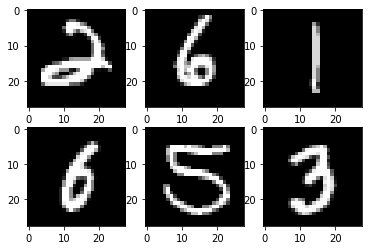

In [25]:
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(samples[i][0],cmap='gray')
#plt.show()

In [26]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size,hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)
    
    def forward(self,x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        return out

model = NeuralNet(input_size, hidden_size, num_classes)

In [27]:
#Loss
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labes) in enumerate(train_loader):
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        outputs = model(images)
        loss = criterion(outputs,labes)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if(i+1) % 100 == 0:
            print(f'epoch {epoch+1} / {num_epochs}, step {i+1}/{n_total_steps}, loss = {loss.item():.4f}')

In [ ]:
#test
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)

        _, predictions = torch.max(outputs,1)
        n_samples += labels.shape[0]
        n_correct += (predictions == labels).sum().item()

acc = 100.0 *n_correct/n_samples
print(f'accuracy = {acc}')